# Machine Learning [2019/2020]

In [1]:

print("Initialising libraries\n")
import matplotlib.pyplot as plt # Used to plot figures
import matplotlib.patches as mpatches # Used to label figures with coloured regions
import matplotlib.lines as mlines # Used to label figures with markers
import numpy as np # Used to format arrays
import pandas as pd # Used to store data in DataFrames
import tensorflow as tf # Used to train MLP classifier
from tensorflow import keras # Used to get MLP predictions
from sklearn.model_selection import train_test_split # Used to create validation set
from sklearn.preprocessing import StandardScaler # Used to standardise features
from sklearn.decomposition import PCA # Used to extract features and reduce dimensionality
from sklearn.cluster import KMeans # Used to cluster testing data
# Formats graphs as intended
%matplotlib inline
print("Libraries loaded\n")


Initialising libraries

Libraries loaded



In [2]:

print("Loading the Data Frames")
AtrainingCSV = pd.read_csv(".\\additional_training.csv") # Read Additional Training in from file 
del AtrainingCSV['ID'] # Remove IDs from DataFrame

trainingCSV = pd.read_csv(".\\training.csv") # Read training set from file
del trainingCSV['ID'] # Remove IDs from DataFrame

testing = pd.read_csv(".\\testing.csv") # Read testing set from file
testingIDs = testing['ID'] # Save IDs to variable for use in formatting the predictions later
del testing['ID'] # Remove IDs from DataFrame
print("Data successfully recieved\n")


Loading the Data Frames
Data successfully recieved



## 1 Preprocessing
### 1.1 Formatting Data

In [3]:

print("Formatting data")
fullTraining = trainingCSV.append(AtrainingCSV) # Combine the Training and AdditionalTraining data sets 
for i in fullTraining: fullTraining[i].fillna(fullTraining[i].mean(),inplace=True) # Replace any missing values with feature means

training, validation = train_test_split(fullTraining,test_size=0.1) # Split off 10% of the training data into a validation set
training = pd.DataFrame(training) # Format as DataFrame
validation = pd.DataFrame(validation)# Format as DataFrame

#Save predictions separately and remove from the data sets
Tpredictions = training['prediction']
Vpredictions = validation['prediction']
del training['prediction']
del validation['prediction']
print("Training, Validation and Testing sets separated\n")


Formatting data
Training, Validation and Testing sets separated



### 1.2 Standardisation

In [4]:

print("Initialising normalisation procedure")
Norm = StandardScaler() # Define a standard scaler
# Fit the scaler to the testing set then apply the scaling transformation to all data sets
normTesting    = pd.DataFrame(Norm.fit_transform(testing.values))
normTraining   = pd.DataFrame(Norm.transform(training.values))
normvalidation = pd.DataFrame(Norm.transform(validation.values))
print("Data successfully normalised\n")


Initialising normalisation procedure
Data successfully normalised



### 1.3 Principal Component Analysis

In [5]:

print("Reducing dimensionality using principal component analysis")
# Define the number of dimensions to reduce to
d = 512
pca = PCA(n_components=d) # Define a new PCA transform
# If the given number of dimensions is reasonable, 
if (d > 0): 
    # Fit the transform to the testing data then apply the transform to all data sets
	pcaTesting    = pd.DataFrame(data = pca.fit_transform(normTesting))
	pcaTraining   = pd.DataFrame(data = pca.transform(normTraining))
	pcavalidation = pd.DataFrame(data = pca.transform(normvalidation))
# If the given number of dimensions is unreasonable,
else: 
    # Do not perform PCA on any of the data sets
	pcaTraining   = normTraining
	pcaTesting    = normTesting
	pcavalidation = normvalidation
print("Dimension reduced to "+str(d)+'\n')


Reducing dimensionality using principal component analysis
Dimension reduced to 512



### 1.4 K-means Clustering
This cell may be required to be ran more than once depending on whether or not the correct cluster is marked as memorable or not.

In [16]:

print("Clustering Testing Data")
KM = KMeans(n_clusters=2) #Define a new KMeans Object
KM.fit(pcaTesting.values) #Fit it to the testing data to find the cluster values
print("Testing Frame Clusters Converged\n")


Clustering Testing Data
Testing Frame Clusters Converged



Graphing KMeans Clustering of the Testing Data


<IPython.core.display.Javascript object>


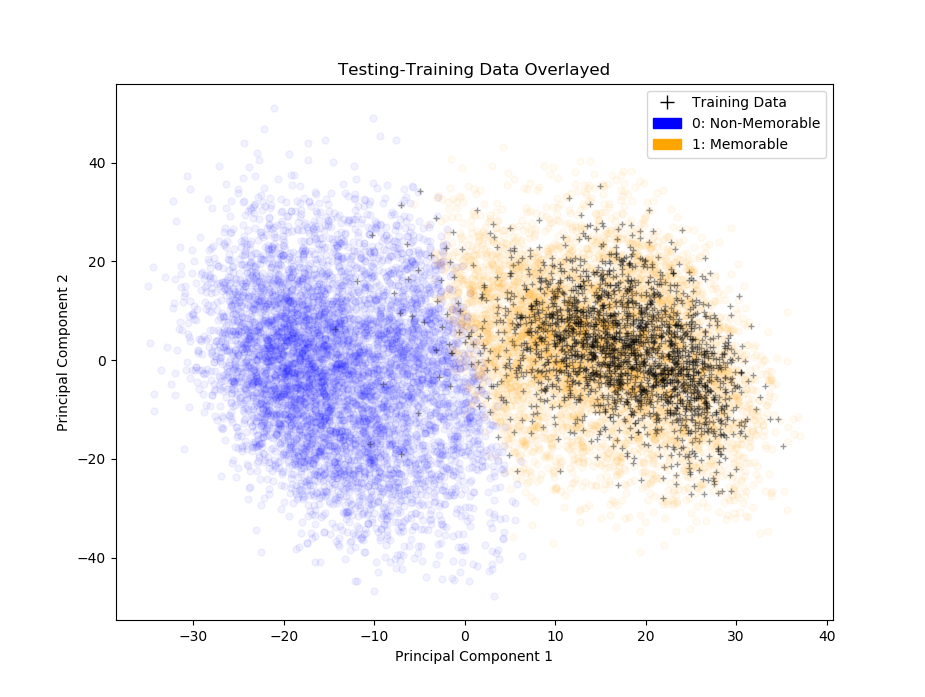

In [17]:

print("Graphing KMeans Clustering of the Testing Data")
# Plot each of the clusters in a different colour
plt.plot(pcaTesting.loc[KM.labels_==1][0], pcaTesting.loc[KM.labels_==1][1],linestyle='', marker='.', markersize = 10, color="orange", alpha=0.05)
plt.plot(pcaTesting.loc[KM.labels_==0][0], pcaTesting.loc[KM.labels_==0][1],linestyle='', marker='.', markersize = 10, color="blue", alpha=0.05)
# Plot the training data overtop to see where it lies in feature space
plt.plot(pcaTraining[0], pcaTraining[1], 'k+', alpha=0.4, markersize = 4)

# Format the legend items
trainlegend = mlines.Line2D([], [],linestyle="", color='black', marker='+', markersize=10, label='Training Data') # Training Data
memlegend = mpatches.Patch(color="blue", label = "0: Non-Memorable") # Non-memorable testing cluster
nmemlegend = mpatches.Patch(color="orange", label = "1: Memorable    ") # Memorable testing cluster
plt.legend(handles=[trainlegend, memlegend,nmemlegend])

#Format plot axis titles
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Testing-Training Data Overlayed")

# Display graph
plt.show()


### 1.5 Domain Adaptation

In [18]:

print("Splicing Datasets")
Composite = pd.DataFrame().append(pcaTraining) #Create a new DataFrame object that contains the Training data
ClusterSize = 1643 # Define the number of additional data points to insert into the training set 
# 1643 is how many is required to balance the number of memorable and non-memorable data points in the training set

# Define a DataFrame that contains all of the data found in the London cluster that is not present in the Brighton data
KMCluster = pcaTesting.loc[KM.labels_==0]
Composite = Composite.append(KMCluster.sample(ClusterSize)) # Add a random sample of 1643 data points from the cluster and add them to the training data
Cpredictions = Tpredictions.append(pd.Series([0]*ClusterSize)) # Add the estimated labels of these cluster values to the predictions

# Reindex both DataFrames
Composite = Composite.reset_index(drop=True)
Cpredictions = Cpredictions.reset_index(drop=True)
print("Composite Set Complete\n")


Splicing Datasets
Composite Set Complete



Displaying Domain Adapted Training Data


<IPython.core.display.Javascript object>


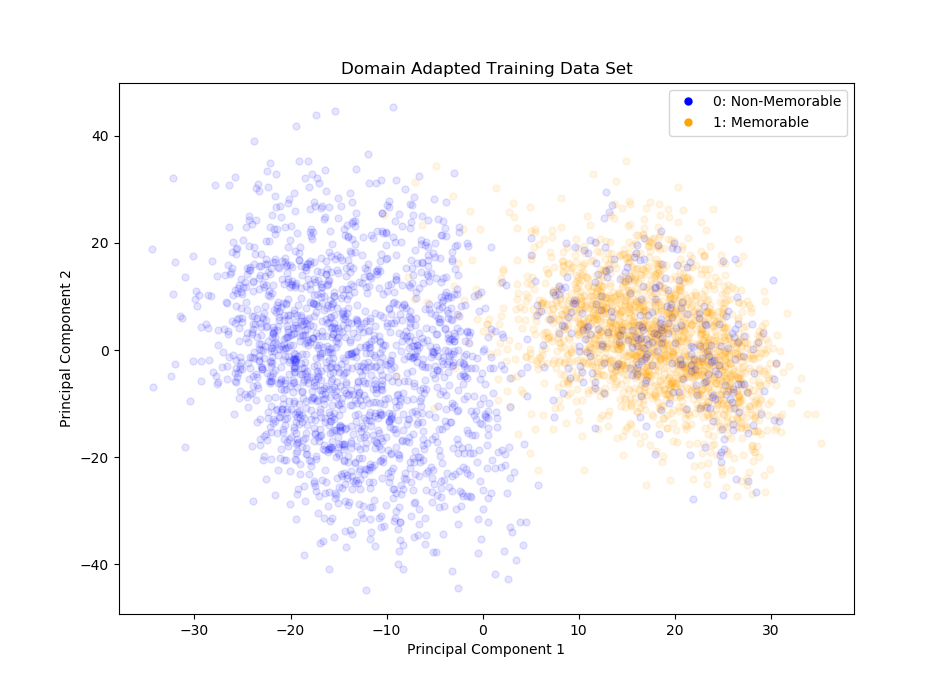

In [19]:

print("Displaying Domain Adapted Training Data")
# Plot composite data set colour coded to it's target label
plt.plot(Composite.loc[Cpredictions == 1][0], Composite.loc[Cpredictions == 1][1],linestyle='', marker='.', markersize = 10, color="orange", alpha=0.1, label = "1: Memorable    ")
plt.plot(Composite.loc[Cpredictions == 0][0], Composite.loc[Cpredictions == 0][1],linestyle='', marker='.', markersize = 10, color="blue", alpha=0.1, label = "0: Non-Memorable")

# Format legend display
train0legend = mlines.Line2D([], [],linestyle="", marker='.', markersize = 10, color="blue", label = "0: Non-Memorable")
train1legend = mlines.Line2D([], [],linestyle="", marker='.', markersize = 10, color="orange", label = "1: Memorable    ")
plt.legend(handles = [train0legend, train1legend])

# Format plot axis titles
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Domain Adapted Training Data Set")

# Display graph
plt.show()


## 2 Classification
### 2.1 Fitting Multilayer Perceptron

In [20]:

print("Training Tensorflow MLP")
# Define MLP model with desired architecture
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(512)), # Input layer 512 features
    keras.layers.Dense(8), # First hidden layer 8 neurons
    keras.layers.Dense(16), # Second hidden layer 16 neurons
    keras.layers.Dense(8), # Third hidden layer 8 neurons
    keras.layers.Dense(1, activation="sigmoid") # Final layer 1 output
])
# Compile the model to produce an MLP structure
model.compile(optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy']
)
# Fit the model and save its output statistics to a variable
history = model.fit(Composite,Cpredictions
                    ,validation_data=(pcavalidation,Vpredictions)
                    ,epochs=30
                    ,verbose=0
                   )
print("Tensorflow MLP Trained")


Training Tensorflow MLP
Tensorflow MLP Trained


Plotting MLP history


<IPython.core.display.Javascript object>


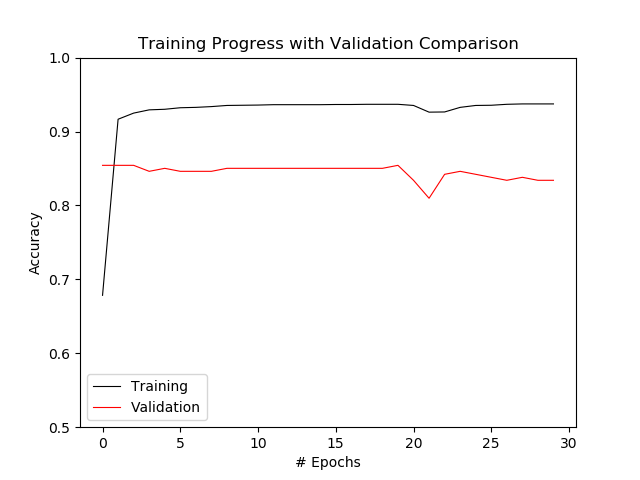

In [21]:

# Plotting Accuracy Graphs
print("Plotting MLP history")
# Plotting accuracy measurement for training and validation set
plt.plot(history.history['accuracy'],'k-', linewidth=0.8 ,label='Training')
plt.plot(history.history['val_accuracy'],'r-',linewidth=0.8,label='Validation')

# Formatting axis titles
plt.xlabel(r"# Epochs")
plt.ylabel(r"Accuracy")
plt.title(r"Training Progress with Validation Comparison")

# Formatting Y-axis scale
plt.ylim(0.5,1)

# Formatting legend
plt.legend()

# Displaying graph
plt.show()


<IPython.core.display.Javascript object>


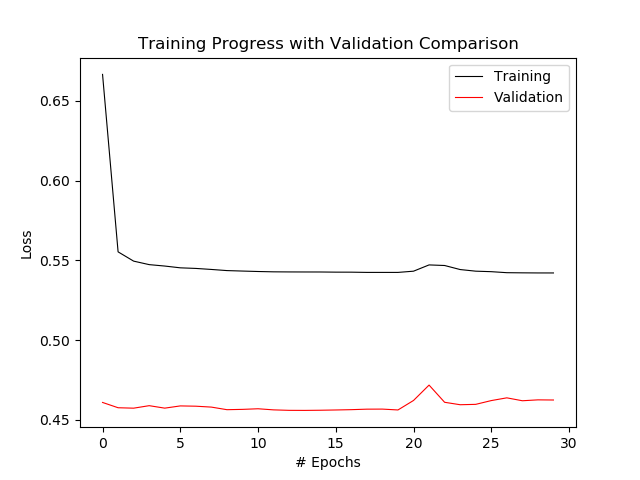

In [22]:

# Plotting Loss Graphs

# Plotting loss measurement for training and validation set
plt.plot(history.history['loss'],'k-', linewidth=0.8 ,label='Training')
plt.plot(history.history['val_loss'],'r-', linewidth=0.8 ,label='Validation')

# Formatting axis titles
plt.xlabel(r"# Epochs")
plt.ylabel(r"Loss")
plt.title(r"Training Progress with Validation Comparison")

# Formatting legend
plt.legend()

# Displaying graph
plt.show()


### 2.2 Predicting Testing Data

In [23]:

print("Categorizing the data")
probability_model = tf.keras.Sequential([model]) # Define a new probability model to output the MLP predictions
predictions = probability_model.predict(pcaTesting) # Save the MLP predictions for the testing data to a variable
predictions = np.round(predictions) # set the continuous 0 <= x <= 1 predictions to be discrete 0 or 1
print("Predictions Calculated\n")


Categorizing the data
Predictions Calculated



Displaying Classified Testing Data


<IPython.core.display.Javascript object>


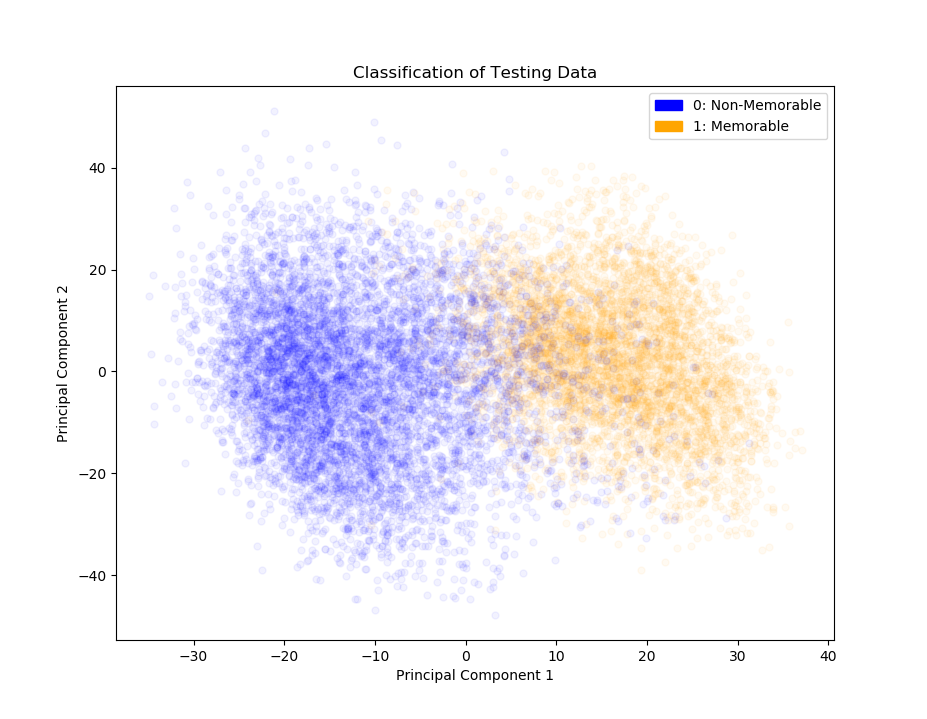

In [24]:

print("Displaying Classified Testing Data")
# Separate memorable and non-memorable data into their own DataFrames
Mem = pcaTesting.loc[predictions==1]
nMem = pcaTesting.loc[predictions==0]

# Plot the predictions with colour coded data
plt.plot(Mem[0],Mem[1],linestyle='', marker='.', markersize = 10, color="orange", alpha=0.05, label = "Memorable")
plt.plot(nMem[0],nMem[1],linestyle='', marker='.', markersize = 10, color="blue", alpha=0.05, label = "Not Memorable")

# Formatting legend objects
memlegend = mpatches.Patch(color="blue", label = "0: Non-Memorable")
nmemlegend = mpatches.Patch(color="orange", label = "1: Memorable    ")
plt.legend(handles=[memlegend,nmemlegend])

# Formatting axis titles
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Classification of Testing Data")

# Displaying graph
plt.show()


### 3 Outputting Predictions

In [25]:

print("Outputting Test Predictions")
results = pd.DataFrame() # Initialise new DataFrame
results['ID'] = testingIDs # Give DataFrame Testing IDs column
results['prediction'] = [int(i) for i in predictions] # Add predictions
results.to_csv('.\\submission_MLP3.csv',index=False) # Save results to csv
print("Predictions Saved\n")


Outputting Test Predictions
Predictions Saved

